# **SyriaTel Customer Churn Prediction**

## Business Understanding

SyriaTel, a telecommunications company aims to retain its customers by minimizing the number of customers that tend to stop doing business with the company after some time. This project is intended to provide insights and help the company make informed decision by letting them know how likely it is for customer to stop opeartions with the company. With the help of machine learning classification models using dataset provided, we can help determine a customer that is likely to churn.

## Data Understanding
The data used for this project provides data on features that will be included in building the models for classification purposes. Some of the data featured include:

* `state` - string. 2-letter code of the US state of customer residence

* `account length` - numerical. Number of months the customer has been with the current telco provider

* `area code` - string="area_code_AAA" where AAA = 3 digit area code.

* `international plan` - (yes/no). The customer has international plan.

* `voice mail plan` - (yes/no). The customer has voice mail plan.

* `number vmail messages` - numerical. Number of voice-mail messages.

* `total day minutes` - numerical. Total minutes of day calls.

* `total day calls` - numerical. Total minutes of day calls.

* `total day charge` - numerical. Total charge of day calls.

* `total eve minutes` - numerical. Total minutes of evening calls.

* `total eve calls` - numerical. Total number of evening calls.

* `total eve charge` - numerical. Total charge of evening calls.

* `total night minutes` - numerical. Total minutes of night calls.

* `total night calls` - numerical. Total number of night calls.

* `total night charge` - numerical. Total charge of night calls.

* `total intl minutes` - numerical. Total minutes of international calls.

* `total intl calls` - numerical. Total number of international calls.

* `total intl charge` - numerical. Total charge of international calls

* `number customer service calls` - numerical. Number of calls to customer service

* `churn` - (yes/no). Customer churn - target variable.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

### **1.Loading Dataset and Data Overview**

In [23]:
#Loading dataset and previewing
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Using `df.info` to get a summarized overview of dataset, including `data type`, `missing data`, `number of records`

In [24]:
#general description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the summary above, we can see there are no missing values which is a good thing and data types appear to be just right. But for the sake of the analysis we'll be coverting object data types to numeric data type

Checking dataset dimension

In [25]:
df.shape

(3333, 21)

Descriptive Statistics

In [26]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In this daset we have several columns with min values of zero, zero appears to be a valid value following the specific data they represent.

### Data Cleaning

Checking for Duplicates

In [27]:
#checking for duplicates
df.duplicated().sum()

0

In the next cell, will be dropping the `phone number`, `state` and `account length` columns as the features don't seem to offer much insight to the analysis hence irrelevant

In [28]:
# Drop the phone number column from the dataset 
df.drop(columns=["phone number", "account length", "state"], axis=1, inplace=True)

In [29]:
#inspecting Nan values
df.isna().sum()

area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Our dataset appears to have no null values

## Univariate Analysis

I intend to do `histogram` plot to inspect the distribution of values in our dataset in various columns. But first, i'll be converting the `object` datatype columns with `binary categories` before doing the plot

In [30]:
#converting binary category columns into 1s and 0s
df['international plan'] = df['international plan'].map({'no': 0, 'yes': 1})
df['voice mail plan'] = df['voice mail plan'].map({'no': 0, 'yes': 1})
df['churn'] = df['churn'].map({False: 0, True: 1})

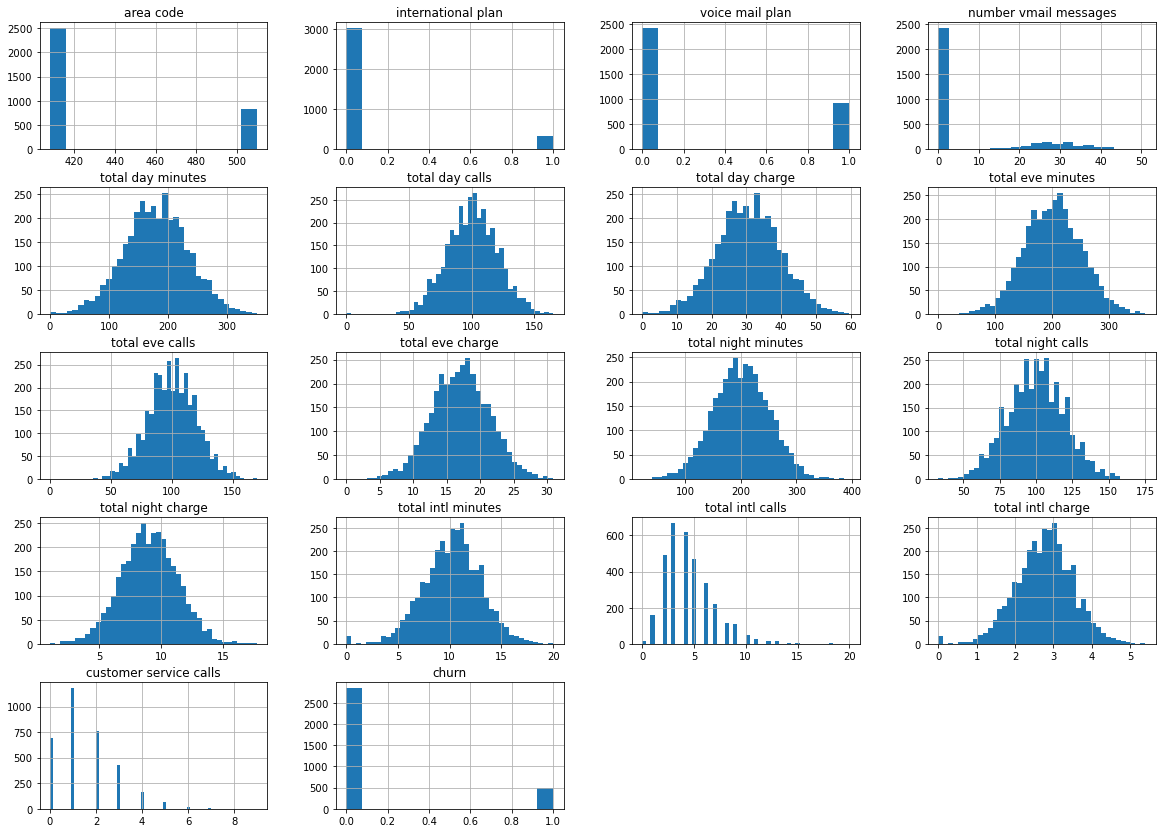

In [31]:
#visualising distribution of values for each columns
df.hist(bins = 'auto', layout = (6,4), figsize = (20,17.5))
plt.show()

Our data appears to be normally distributed as shown by the `bell`-like shape of values in most of the columns. 

Next, we can take a look at our Target variable `churn` and investigate how it relates to the other variables in our dataset

### Investigating the Target Variable

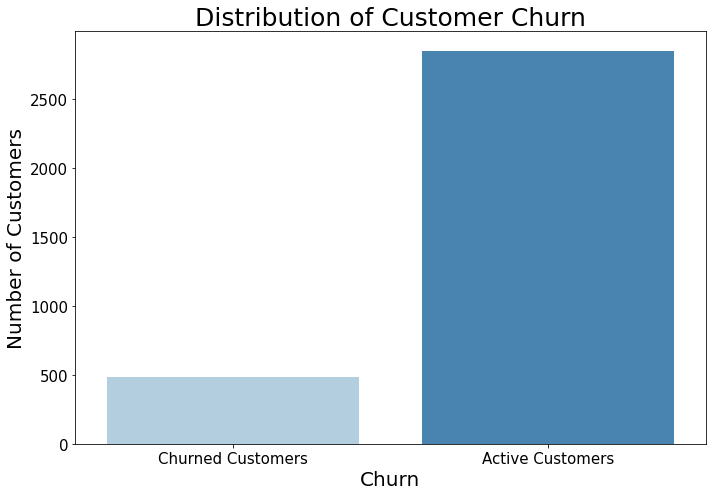

In [32]:
# Distribution of Active customers vs Churned Customers
churn_dist = df["churn"].value_counts()

# Plotting the distributions
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(x = [0, 1], y = df["churn"], palette='Blues', data = churn_dist, ax = ax)
plt.title('Distribution of Customer Churn', fontsize = 25)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Number of Customers', fontsize=20)
ax.set_xticklabels(['Churned Customers', 'Active Customers'])
plt.tight_layout()

In [33]:
print("Churn Count")
print(df['churn'].value_counts())
print()
print("Churn Percentage")
print(df['churn'].value_counts(normalize=True))

Churn Count
0    2850
1     483
Name: churn, dtype: int64

Churn Percentage
0    0.855086
1    0.144914
Name: churn, dtype: float64


About **14%** of SyriaTel customers stopped using the companies product and services over this particular period of time. There's a huge imbalance between the churn customers and active customers, which from a business stand-point isn't quite bad in an instance where the active customers are more. 

We can then take a look at how other features relate to the column churn with the help of `.corr()` function

### Relational Analysis with Target Variable

I will be using `.corr()` to investigate input features correlation with `churn`

In [34]:
# Correlation with Churn 
df.corr().churn.sort_values(ascending=False)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64

Overall, there's is weak correlation between `churn` and the other features in the dataset. We might want to have a look at some of the relatively strongly correlated features against `churn` to see what we might uncover. I'll start with `international plan` to see how customer behavior across those with an international plan and those without.

### `International` `Plan` Vs `Churn`

In [35]:
#grouping by international plan and finding churn in customers with and without an international plan
int_plan_churn = pd.DataFrame(df.groupby(['international plan'])['churn'].mean()).reset_index()
int_plan_churn

,international plan,churn
0,0,0.114950
1,1,0.424149


On average, about **42.4%** of customers with an international stop doing business with the company at some point. That's almost half the subscription begging further investigation.

Cell below is a bar plot of churn rates between customers with and without an international plan

[]

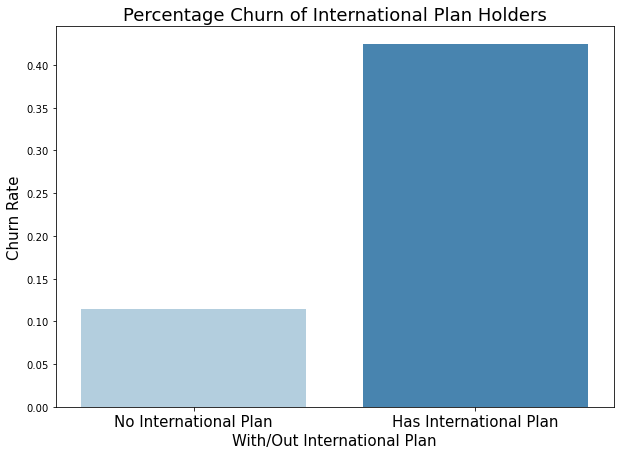

In [36]:
# Plot bar plot of international plan vs churn 
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=int_plan_churn, x=int_plan_churn['international plan'], y='churn', palette="Blues", ax = ax)
plt.title('Percentage Churn of International Plan Holders', fontsize=18)
plt.xlabel('With/Out International Plan', fontsize=15)
plt.ylabel('Churn Rate', fontsize=15)
ax.set_xticklabels(['No International Plan', 'Has International Plan'], fontsize=15)
plt.plot()

The next feature to investigate would be `customer service calls` which is the number of calls made to customer service

### `Customer Service Calls` vs `Churn`

We might first have to explore `customer service calls` columns to see the values we have by checking `.value_counts()` and then inspect the churn rate across different number of calls

In [37]:
#checking value counts in customer service calls column
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In this dataset we have calls ranging from 0 calls to 9 calls 

In [38]:
#churn rate across different number of calls
cust_serv_calls = pd.DataFrame(df.groupby(['customer service calls'])['churn'].mean()).reset_index()
cust_serv_calls

,customer service calls,churn
0,0,0.131994
1,1,0.103302
2,2,0.114625
3,3,0.102564
4,4,0.457831
5,5,0.606061
6,6,0.636364
7,7,0.555556
8,8,0.500000
9,9,1.000000


Customers who made 3 calls to customer service had the lowest churn rate closely followed by 1 call, rather unexpected as the expectation is zero calls would have the lowest churn rate. Something worth noting however is, overall, customer with fewer calls made to customer service had a smaller churn rate compared to relatively more calls made to customer service.

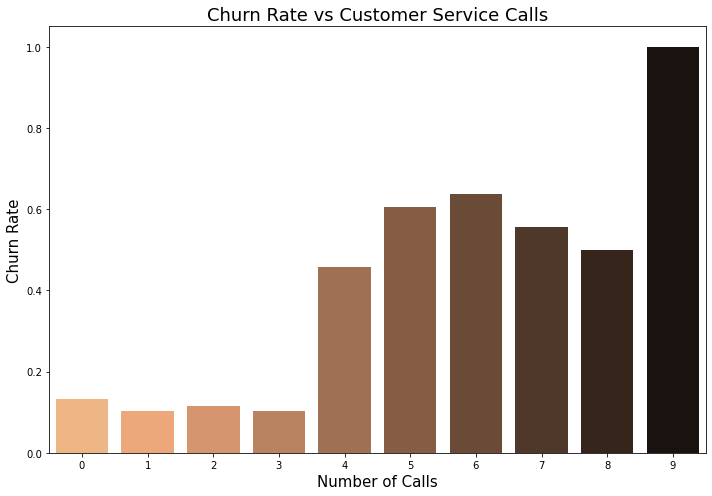

In [39]:
# Bar plot for customer service calls
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=cust_serv_calls, x=cust_serv_calls['customer service calls'], y='churn',palette="copper_r", ax = ax)
plt.title('Churn Rate vs Customer Service Calls', fontsize=18)
plt.ylabel('Churn Rate', fontsize=15)
plt.xlabel('Number of Calls', fontsize=15)
plt.tight_layout();

Apart from 7 and 8, the higher the number of customer service calls made by a customer, the more likely a customer churns.
Once a customer hits 4 calls, the churn rate significantly increases. 
It would seem somewhat obvious for the case to be so assumming less satisfied customers would call more often but further investigation into nature of calls and issues reported might provide insight into what can be improved with the hope of reducing customer service calls.

Next we'll look into average day spending of both active and customers that churn with `total day charge` column

### `Total Day charge` vs `Churn`

In [40]:
#Finding average spending by a customer who churns and an active customer
tdc = pd.DataFrame(df.groupby(df['churn'])['total day charge'].mean()).reset_index() #.reset_index() to remove column churn as index column
tdc

,churn,total day charge
0,0,29.780421
1,1,35.175921


On average, a customer who churns spends 35.17 whereas an active customer spends 29.78

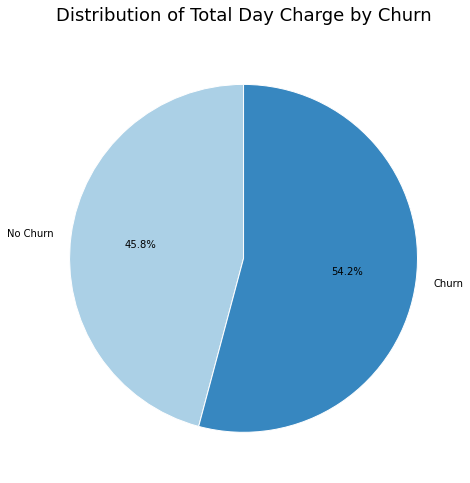

In [41]:
# # total_day_charge plan bar plot 
# fig, ax = plt.subplots(figsize=(10,7))
# sns.barplot(data=tdc, x=tdc['churn'], y='total day charge', palette="Blues", ax = ax)
# plt.title('Average Day Charge of Customers', fontsize=18)
# plt.xlabel('Churn', fontsize=20)
# plt.ylabel('Average Day Charge', fontsize=15)
# ax.set_xticklabels(['No', 'Yes'], fontsize=12)
# plt.tight_layout;

# Data Preparation: Group by churn and calculate total day charge
tdc_grouped = tdc.groupby('churn')['total day charge'].sum().reset_index()
tdc_grouped['labels'] = ['No Churn', 'Churn']

# Extract data for plotting
labels = tdc_grouped['labels']
charges = tdc_grouped['total day charge']

# Create Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = sns.color_palette("Blues", len(labels))

ax.pie(
    charges,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

# Add Title
plt.title('Distribution of Total Day Charge by Churn', fontsize=18, pad=20)
plt.show()

From the dataset, customer than churn seem to spend more on average per day compared to those that don't churn. 

It might also be interesting to look at `area code` column to see whether an area code has aany influence in whether a customer churns or doesn't.

### `Area code` vs `Churn`

In [42]:
#grouping by area code column
area_code = df.groupby('area code')['churn'].mean()
area_code

area code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64

Area code 510 apears to have a relatively higher churn rate compared to area code 408 and 415 although disparities are quite small across the area codes

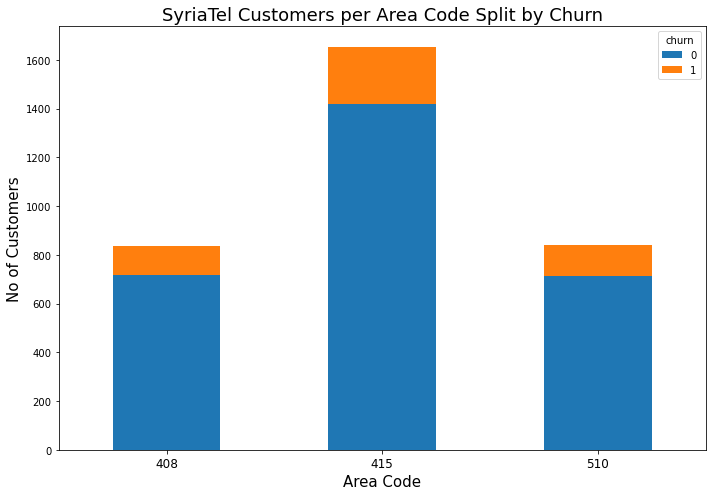

In [43]:
#plotting Area code vs churn
fig, ax = plt.subplots(figsize = (10, 7))
df.groupby(['area code', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax);
plt.title('SyriaTel Customers per Area Code Split by Churn', fontsize = 18)
ax.tick_params(axis ='x', labelrotation=0, labelsize = 12)
plt.xlabel('Area Code', fontsize = 15)
plt.ylabel('No of Customers', fontsize = 15)
plt.tight_layout()

Area code 415 has relatively more customers who churned compared to area code 510 despite having a higher churn rate. Not much uncovered here from this column.

Next, we might want to dive into relational analysis and investigate how the features correlate with each other and check for multicollinearity if possible.

## Multivariate Analysis
We'll be using a confusion matrix in a heat map to check correlations in our dataset

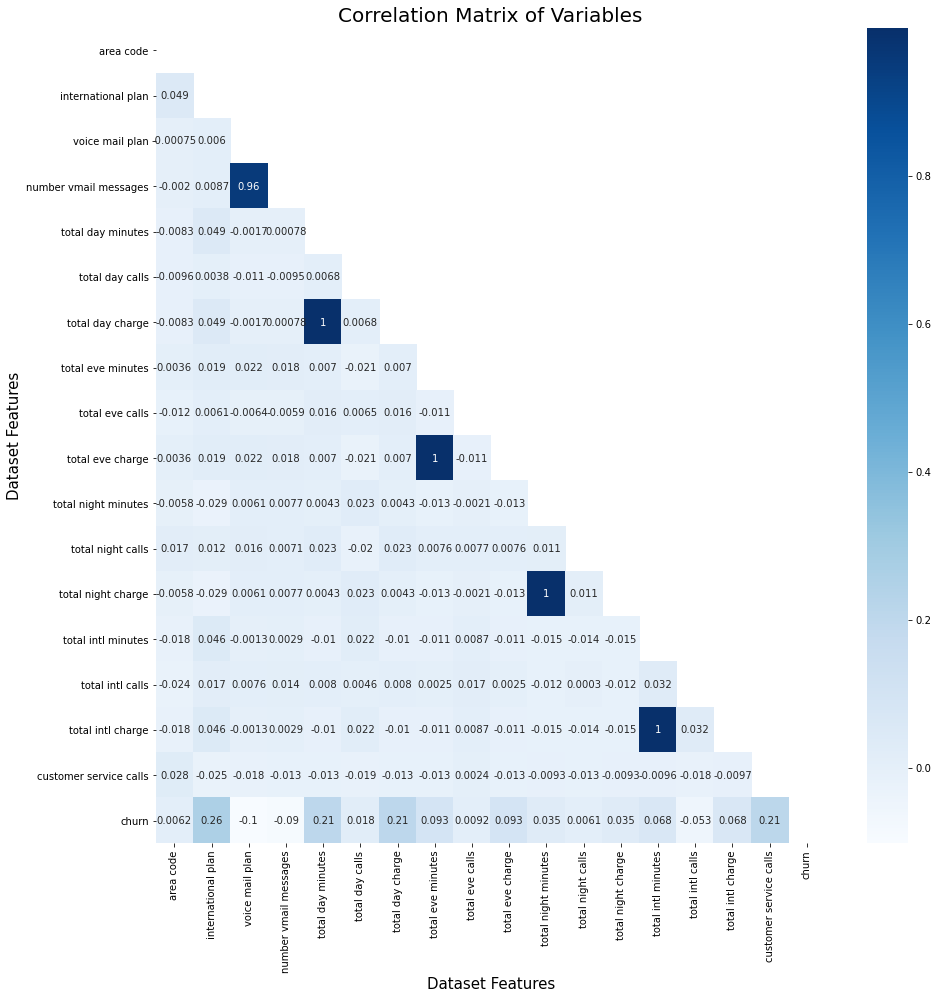

In [44]:
#Plotting a heatmap

# correlation matrix 
corrMatrix = df.corr()
matrix = np.triu(corrMatrix)

# plot correlation matrix in heat map with seaborn
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrMatrix, annot=True, mask=matrix, cmap='Blues')

# label plot
plt.title('Correlation Matrix of Variables', size=20)
plt.xlabel('Dataset Features', size=15)
plt.ylabel('Dataset Features', size=15)
plt.xticks(size=10)
plt.yticks(size=10);

Most of the dataset features are not strongly correlated, except for one feature `number vmail messages` and `voice mail plan`

## Preparing Data for Modeling

### Feature Selection

I'll be selecting `churn` as my target variables and the independent variables separately into y, X respectively.

In [45]:
#Feature selection
X = df.drop('churn', axis=1)
y = df['churn']

Next, we separate the data into a train set and test set prior to performing any preprocessing steps.
If we had a model that always said a customer will not churn (class 0), we would get an accuracy score of **85%** since 85% of the customers are active customers. To ensure an even balance of customers in the train_test split, we'll use `stratify=y` when performing the split.

In [46]:
#splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42, stratify=y)

### Scaling
Instatiating `MinMaxScaler` and fitting it on `X_train` in a new variable `X_train_scaled` and `X_test_scaled` to contain values transformed by the scaler. 

In [47]:
#instantiate and fit scaler
scaler = MinMaxScaler()

#transforming input values 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SMOTE

To address the imbalance problem, I'll use SMOTE to create a synthetic sample class

In [48]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())

#instatiating SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    2137
0    2137
Name: churn, dtype: int64


## Modeling and Evaluation
### Baseline Model : Logistic Regression

I will create a vanilla baseline model which I will use for comparison later on. 
My baseline model will be a simple logistic regression keeping everything at default except for `random_state=42` for reproducibility

In [49]:
#instatiating model
base_logreg = LogisticRegression(random_state=42)

#fit model 
base_logreg.fit(X_train_resampled, y_train_resampled)

# make prediction
y_pred = base_logreg.predict(X_test_scaled)

print()
print('Training Score:',base_logreg.score(X_train_resampled, y_train_resampled))
print()
print('Test score:',base_logreg.score(X_test_scaled, y_test))
print()
print(classification_report(y_test, y_pred))


Training Score: 0.7819372952737482

Test score: 0.7673860911270983

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       713
           1       0.35      0.73      0.48       121

    accuracy                           0.77       834
   macro avg       0.65      0.75      0.66       834
weighted avg       0.86      0.77      0.80       834



The baseline model has train accuracy slightly higher, not enough to indicate a case of overfitting. The score for the minority class however is not so good at 0.35

### Model 2 : DecisionTree Classfier

In [50]:
#instatiate model
dtr_clf = DecisionTreeClassifier(random_state=42)
#fit model
dtr_clf.fit(X_train_resampled, y_train_resampled)
#predict the labels on test data
y_pred = dtr_clf.predict(X_test_scaled)

print()
print('Training Score:',dtr_clf.score(X_train_resampled, y_train_resampled))
print()
print('Test Score:',dtr_clf.score(X_test_scaled, y_test))
print()
print(classification_report(y_test, y_pred))



Training Score: 1.0

Test Score: 0.8741007194244604

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       713
           1       0.55      0.75      0.63       121

    accuracy                           0.87       834
   macro avg       0.75      0.82      0.78       834
weighted avg       0.90      0.87      0.88       834



It's clear our model is overfitting given how different the train score is from the test score. The second model however has better recall scores compared to the baseline model which is a good thing. 

The next thing is to try and tune some hyperparameters to see if if the model improves

In [51]:
# Create a random forest classifier
dtr_clf2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=18)

#fit model
dtr_clf2 = dtr_clf2.fit(X_train_resampled, y_train_resampled)

#predict the labels on test data
y_pred = dtr_clf2.predict(X_test_scaled)

print()
print('Training Score:',dtr_clf2.score(X_train_resampled, y_train_resampled))
print()
print('Test Score:',dtr_clf2.score(X_test_scaled, y_test))
print()
print(classification_report(y_test, y_pred))



Training Score: 0.9389330837622836

Test Score: 0.9052757793764988

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       713
           1       0.65      0.74      0.69       121

    accuracy                           0.91       834
   macro avg       0.80      0.84      0.82       834
weighted avg       0.91      0.91      0.91       834



Changing the `min_samples_leaf=18` seems to have improved the model overall by reducing train score and increasing test score. The model however does not improve much with the minority class, there's still a slight overfit.

Next I will try ensemble method Xgb and compare it to a bagging classifier

### Model 3: Random Forest Classifier

In [52]:
#instantiate and fit RFC model
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(X_train_resampled,y_train_resampled)
# Predict the labels of the test data
y_pred = rf_clf.predict(X_test_scaled)

# Print the results
print('Train Score:',rf_clf.score(X_train_resampled,y_train_resampled))
print('Test Score:',rf_clf.score(X_test_scaled,y_test))
print(classification_report(y_test, y_pred))


Train Score: 1.0
Test Score: 0.9328537170263789
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       713
           1       0.77      0.77      0.77       121

    accuracy                           0.93       834
   macro avg       0.86      0.86      0.86       834
weighted avg       0.93      0.93      0.93       834



The model actually performs quite well. I would prefer to further increase my recall score for the churn class so that I get a better score at really catching class 1 (minority class)

Additionally, the fact that the model has 100% accuracy on the training set but slightly lower accuracy (0.9328) on the test set suggests that the model may be overfitting to the training data. I will next tune some hyperparameters to hopefully improve the model.I will first try to reduce the classification threshold

In [53]:
# Create a random forest classifier
rf_clf2 = RandomForestClassifier(max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators = 150,random_state=42)

rf_clf2.fit(X_train_resampled, y_train_resampled)

# Print the results
print('Accuracy on training set:',rf_clf2.score(X_train_resampled,y_train_resampled))
print('Accuracy on test set:',rf_clf2.score(X_test_scaled,y_test))

print(classification_report(y_test, y_pred))
print()
display('Test Data confusion maxtrix:',confusion_matrix(y_test, y_pred))

Accuracy on training set: 0.99719232569022
Accuracy on test set: 0.9268585131894485
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       713
           1       0.77      0.77      0.77       121

    accuracy                           0.93       834
   macro avg       0.86      0.86      0.86       834
weighted avg       0.93      0.93      0.93       834




'Test Data confusion maxtrix:'

array([[685,  28],
       [ 28,  93]], dtype=int64)

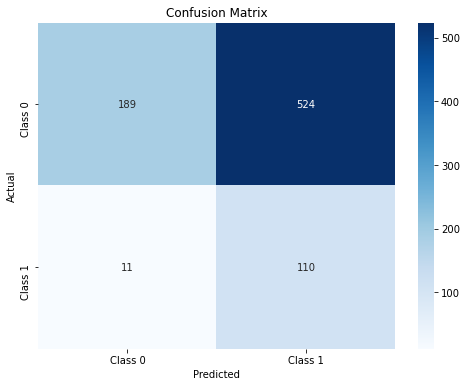

In [54]:
#setting up confusion matrix
y_pred = rf_clf2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Replace these labels with your actual class labels
class_labels = ['Class 0', 'Class 1']

plot_confusion_matrix(cm, class_labels)



Tuning does not really seem to improve the model's performance. if anything a few values seem to take a dip.The base model has been the best model so far overall which I will be using for my classification.

Next I'll look at how important the individual data features are to my model>


### Feature Importance

In [55]:
rf_clf2.feature_importances_

array([0.0608629 , 0.11265222, 0.01991683, 0.03288505, 0.1169854 ,
       0.02391531, 0.12726571, 0.04317172, 0.02673324, 0.04745775,
       0.02616461, 0.02257124, 0.02733522, 0.03112882, 0.06338909,
       0.03178737, 0.18577751])

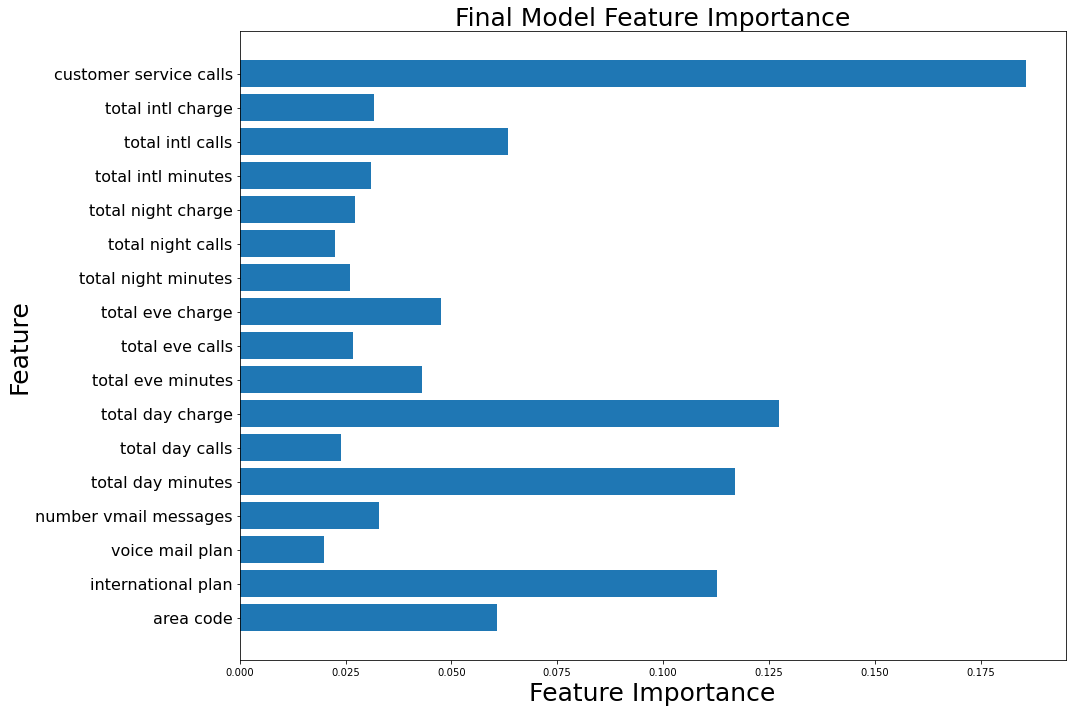

In [56]:
#plotting barh for the features 
#function to set up horizontal bar pllot
def plot_features_importances(rf_clf2):
    n_features = X_test.shape[1]
    plt.figure(figsize=(15,10))
    plt.barh(range(n_features), rf_clf2.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_test.columns.values, fontsize = 16)
    plt.xlabel('Feature Importance', fontsize = 25)
    plt.ylabel('Feature', fontsize = 25)
    plt.title('Final Model Feature Importance', fontsize = 25)
    plt.tight_layout()
    
plot_features_importances(rf_clf2)

We can see from this feature importance graph that there are about four features that have a significant weight on the model.

* `customer service calls`
* `total day charge`
* `international plan`
* `total day minutes`


## Observations and Conclusions

The RandomTree Classifier was the best model overall in the analysis in regards to `accuracy scores` and `recall score`, `f1 score` and `precision score` for both classes. Metrics standing at:

* `Train data accuracy score` - 99%
* `Test data accuracy score` - 92%
* `w Recall score` - 93%
* `f1` - 93%
* `W Precision` - 93%

Precision — What percent of your predictions were correct? Based on the above findings, the model accurately predicts that one will discontinue utilizing the company's services 96% of the time.

Recall captures What percent of the positive cases the model predicts. This model captures 77% of the positive cases.

F1 score answers the question of what percent of positive predictions were correct? On this, the model captures ~96% of correct positive predictions.

Accuracy, as its name implies, takes into account the model's overall accuracy, however this is only true when the model is balanced. This model balances for the situation at hand, accurately projecting the outcomes 93% of the time.

The three most important features for predicting customer churn are international plan, total day charge plan, customer service calls. We've noted that that customers who have an international plan are more likely to churn, as are those with higher customer service calls



## Limitations and Recommendations

From the data findings, the company could look into what the customer service calls are about to try and find ways to improve on what can be improved in the long run as the findings suggest customer service calls had the highest weight on the model. More detail on the calls might help address the issue on what can be improved or narrow down the weak areas.

The company could also investigate ways to retain customers that have an average total day charge of 35 dollars. Possibly creating more incentives and added perks to their phone plans could sway these customers from stopping to do business with the company.

Further discussion and investigations should be taken place to formulate a plan to retain customers with internal plan as well

